In [ ]:
# Import Dependencies
import numpy as np
import pandas as pd

import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import os
import csv
from matplotlib import pyplot as plt
import scipy.stats as st

In [ ]:
# Best S&P500 ETF to show performance of the S&P500
SPY = pdr.get_data_yahoo('SPY', start='2001-06-15')
# Best NASDAQ ETF to show performance of the NASDAQ
QQQ = pdr.get_data_yahoo('QQQ', start='2001-06-15')
# Best DOW ETF to show performance of the DOW
VTI = pdr.get_data_yahoo('VTI', start='2001-06-15')

# Grabbing a list of all SECTOR ETFS from https://etfdb.com/etfs/sector/ to keep it Standardized.
# Technology, Healthcare, Energy, Real Estate, Materials, Financials, Industrials, Utilities, Consumer Staples, Consumer Discretionary, Communication Services/Telecom.
# Are the main 11 Sectors in the US Economy.

# QQQ is already the Technology NASDAQ best fit.
# Import the XLK (Biggest Technology ETF Fund)
XLK = pdr.get_data_yahoo('XLK', start='2001-06-15')
# XLC (Communication Services/Telecom ETF)
XLC = pdr.get_data_yahoo('XLC', start='2001-06-15')
# XLY (Consumer Cyclical/Consumer Discretionary ETF)
XLY = pdr.get_data_yahoo('XLY', start='2001-06-15')
# XLP (Consumer Defensive/Consumer Staples ETF)
XLP = pdr.get_data_yahoo('XLP', start='2001-06-15')
# XLV (Healthcare ETF)
XLV = pdr.get_data_yahoo('XLV', start='2001-06-15')
# XLI (Industrials ETF)
XLI = pdr.get_data_yahoo('XLI', start='2001-06-15')
# XLF (Financials ETF)
XLF = pdr.get_data_yahoo('XLF', start='2001-06-15')
# VNQ (Real Estate ETF)
VNQ = pdr.get_data_yahoo('VNQ', start='2001-06-15')
# XLE (Energy ETF)
XLE = pdr.get_data_yahoo('XLE', start='2001-06-15')
# XLU (Utilities ETF)
XLU = pdr.get_data_yahoo('XLU', start='2001-06-15')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Not all Data is equal length. Might want to look for other ETFs to get longer span of Index.
# QQQ.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\QQQ.csv', index=False)
# SPY.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\SPY.csv', index=False)
# VTI.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\VTI.csv', index=False)
# XLK.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLK.csv', index=False)
# XLC.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLC.csv', index=False)
# XLY.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLY.csv', index=False)
# XLP.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLP.csv', index=False)
# XLV.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLV.csv', index=False)
# XLI.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLI.csv', index=False)
# XLF.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLF.csv', index=False)
# VNQ.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\VNQ.csv', index=False)
# XLE.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLE.csv', index=False)
# XLU.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLU.csv', index=False)

files = ['QQQ', 'SPY', 'VTI', 'XLK', 'XLC', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU']
file_paths = [f'F:\\CODE\\Bootcamp-Project1\\DATA\\{file}.csv' for file in files]

for file, file_path in zip(files, file_paths):
    locals()[file].to_csv(file_path, index=True)


In [ ]:
XLV.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15 00:00:00-04:00,28.700001,29.000000,28.450001,28.900000,20.593172,56100
2001-06-18 00:00:00-04:00,28.900000,28.900000,28.459999,28.459999,20.279648,10900
2001-06-19 00:00:00-04:00,28.600000,28.840000,28.510000,28.540001,20.336658,8100
2001-06-20 00:00:00-04:00,28.500000,29.200001,28.500000,29.160000,20.778431,4600
2001-06-21 00:00:00-04:00,29.160000,29.549999,29.160000,29.490000,21.013586,7400


In [ ]:
# Show that that DataFrame SPY imported OK
SPY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15 00:00:00-04:00,120.910004,122.400002,120.400002,121.849998,81.138451,16821100
2001-06-18 00:00:00-04:00,121.650002,122.440002,120.910004,121.260002,80.745613,11368300
2001-06-19 00:00:00-04:00,122.379997,122.889999,120.889999,121.790001,81.098480,7732300
2001-06-20 00:00:00-04:00,121.190002,122.860001,121.099998,122.430000,81.524704,8787200
2001-06-21 00:00:00-04:00,122.220001,124.309998,122.150002,123.820000,82.450249,12259100


In [ ]:
SPY.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30 00:00:00-05:00,402.799988,405.130005,400.279999,400.589996,400.589996,74202000
2023-01-31 00:00:00-05:00,401.130005,406.529999,400.769989,406.480011,406.480011,86811800
2023-02-01 00:00:00-05:00,405.209991,413.670013,402.350006,410.799988,410.799988,101459200
2023-02-02 00:00:00-05:00,414.859985,418.309998,412.880005,416.779999,416.779999,101654500
2023-02-03 00:00:00-05:00,411.589996,416.970001,411.089996,412.350006,412.350006,94647400


In [ ]:
# Show that that DataFrame QQQ imported OK
QQQ.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15 00:00:00-04:00,41.799999,43.070000,41.279999,42.599998,36.629753,84589400
2001-06-18 00:00:00-04:00,42.639999,43.169998,41.400002,42.029999,36.139641,63539100
2001-06-19 00:00:00-04:00,43.320000,43.560001,41.259998,41.820000,35.959068,73386900
2001-06-20 00:00:00-04:00,41.299999,42.970001,41.279999,42.770000,36.775932,83588600
2001-06-21 00:00:00-04:00,42.669998,44.230000,42.299999,43.349998,37.274635,67212600


In [ ]:
QQQ.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30 00:00:00-05:00,292.929993,294.380005,289.890015,290.269989,290.269989,49405800
2023-01-31 00:00:00-05:00,290.309998,294.720001,290.200012,294.619995,294.619995,46705100
2023-02-01 00:00:00-05:00,294.410004,303.429993,292.299988,300.920013,300.920013,67562200
2023-02-02 00:00:00-05:00,307.570007,313.679993,306.730011,311.720001,311.720001,83070600
2023-02-03 00:00:00-05:00,304.940002,312.390015,304.540009,306.179993,306.179993,76110300


In [ ]:
# Show that that DataFrame VTI imported OK
VTI.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15 00:00:00-04:00,55.424999,56.005001,55.174999,55.665001,37.544468,1067400
2001-06-18 00:00:00-04:00,55.814999,55.915001,55.310001,55.310001,37.305042,282600
2001-06-19 00:00:00-04:00,56.150002,56.165001,55.235001,55.465000,37.409584,1777600
2001-06-20 00:00:00-04:00,55.375000,56.075001,55.375000,56.049999,37.804142,476000
2001-06-21 00:00:00-04:00,56.000000,56.724998,55.875000,56.500000,38.107658,240400


In [ ]:
VTI.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30 00:00:00-05:00,202.279999,203.610001,201.089996,201.210007,201.210007,2992300
2023-01-31 00:00:00-05:00,201.649994,204.490005,201.449997,204.429993,204.429993,4827600
2023-02-01 00:00:00-05:00,203.910004,208.320007,202.509995,206.919998,206.919998,4385600
2023-02-02 00:00:00-05:00,209.000000,210.880005,208.100006,210.009995,210.009995,3730800
2023-02-03 00:00:00-05:00,207.509995,210.179993,207.039993,207.839996,207.839996,2853500


In [ ]:
VTI = VTI.reset_index()


In [ ]:
QQQ = QQQ.reset_index()


In [ ]:
SPY = SPY.reset_index()

In [ ]:
VTI["Ticker"] = "VTI"
QQQ["Ticker"] = "QQQ"
SPY["Ticker"] = "SPY"
VTI.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2001-06-15 00:00:00-04:00,55.424999,56.005001,55.174999,55.665001,37.544468,1067400,VTI
1,2001-06-18 00:00:00-04:00,55.814999,55.915001,55.310001,55.310001,37.305042,282600,VTI
2,2001-06-19 00:00:00-04:00,56.150002,56.165001,55.235001,55.465000,37.409584,1777600,VTI
3,2001-06-20 00:00:00-04:00,55.375000,56.075001,55.375000,56.049999,37.804142,476000,VTI
4,2001-06-21 00:00:00-04:00,56.000000,56.724998,55.875000,56.500000,38.107658,240400,VTI


In [ ]:
QQQ.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2001-06-15 00:00:00-04:00,41.799999,43.070000,41.279999,42.599998,36.629753,84589400,QQQ
1,2001-06-18 00:00:00-04:00,42.639999,43.169998,41.400002,42.029999,36.139641,63539100,QQQ
2,2001-06-19 00:00:00-04:00,43.320000,43.560001,41.259998,41.820000,35.959068,73386900,QQQ
3,2001-06-20 00:00:00-04:00,41.299999,42.970001,41.279999,42.770000,36.775932,83588600,QQQ
4,2001-06-21 00:00:00-04:00,42.669998,44.230000,42.299999,43.349998,37.274635,67212600,QQQ


In [ ]:
SPY.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2001-06-15 00:00:00-04:00,120.910004,122.400002,120.400002,121.849998,81.138451,16821100,SPY
1,2001-06-18 00:00:00-04:00,121.650002,122.440002,120.910004,121.260002,80.745613,11368300,SPY
2,2001-06-19 00:00:00-04:00,122.379997,122.889999,120.889999,121.790001,81.098480,7732300,SPY
3,2001-06-20 00:00:00-04:00,121.190002,122.860001,121.099998,122.430000,81.524704,8787200,SPY
4,2001-06-21 00:00:00-04:00,122.220001,124.309998,122.150002,123.820000,82.450249,12259100,SPY


In [ ]:
#Check to see if the data merged.
data = pd.concat([SPY, QQQ, VTI])
data.sample(30)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
4840,2020-09-11 00:00:00-04:00,335.820007,336.970001,331.000000,334.059998,321.737885,84680200,SPY
740,2004-05-28 00:00:00-04:00,36.380001,36.549999,36.209999,36.549999,31.439920,56379500,QQQ
5231,2022-03-31 00:00:00-04:00,457.890015,458.760010,451.160004,451.640015,445.810577,121699900,SPY
3262,2014-06-06 00:00:00-04:00,92.629997,92.820000,92.449997,92.820000,86.246689,22680600,QQQ
3409,2015-01-06 00:00:00-05:00,202.089996,202.720001,198.860001,199.820007,172.617355,209151400,SPY
1161,2006-01-31 00:00:00-05:00,63.855000,63.985001,63.580002,63.650002,46.177456,385400,VTI
1112,2005-11-17 00:00:00-05:00,123.680000,124.650002,123.139999,124.639999,89.036316,55717500,SPY
212,2002-04-25 00:00:00-04:00,51.025002,51.285000,50.900002,51.235001,34.994846,77600,VTI
1868,2008-11-19 00:00:00-05:00,85.910004,86.870003,80.919998,81.500000,61.670948,558327600,SPY
49,2001-08-24 00:00:00-04:00,53.500000,54.345001,53.404999,54.345001,36.745811,52400,VTI


In [ ]:
#Test that we have the correct amount of Unique tickers added to the DataFrame
Ticker_count = len(data.groupby("Ticker").nunique())
print(Ticker_count)

3


In [ ]:
#Describe the Data to see what pops out if anything.
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,1.633200e+04
mean,131.908265,132.740061,130.976431,131.912645,117.732648,6.304580e+07
std,94.359448,94.956756,93.700582,94.373916,94.970661,7.701019e+07
min,19.940001,20.530001,19.760000,20.059999,17.248652,1.160000e+04
25%,58.587501,58.937499,58.240002,58.583750,46.619899,2.982275e+06
50%,109.035000,109.594997,108.330002,109.024998,87.843327,4.294315e+07
75%,170.369995,171.250000,169.212505,170.309998,158.923141,9.016128e+07
max,479.220001,479.980011,476.059998,477.709991,470.083710,8.710263e+08


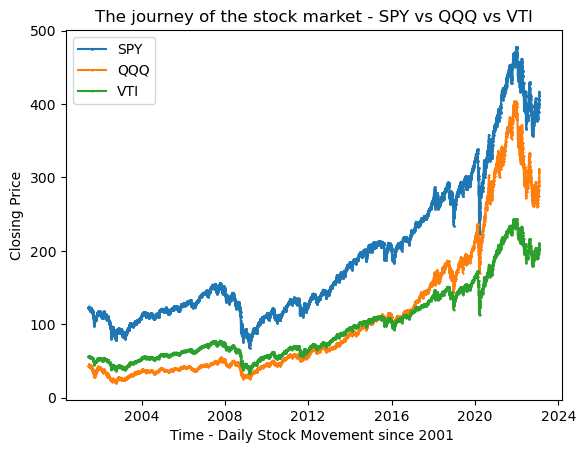

In [ ]:
#Plot out the initial info we have to see what we are working with.
SPY_line = data.loc[data["Ticker"] == "SPY"]
QQQ_line = data.loc[data["Ticker"] == "QQQ"]
VTI_line = data.loc[data["Ticker"] == "VTI"]
plt.plot(SPY_line["Date"], SPY_line["Close"], marker = 'o', markersize=1)
plt.plot(QQQ_line["Date"], QQQ_line["Close"], marker = 'x', markersize=1)
plt.plot(VTI_line["Date"], VTI_line["Close"], marker = 'v', markersize=1)
plt.xlabel("Time - Daily Stock Movement since 2001 ")
plt.ylabel("Closing Price")
plt.title(f"The journey of the stock market - SPY vs QQQ vs VTI")
plt.legend(["SPY", "QQQ", "VTI"], loc="best")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16332 entries, 0 to 5443
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype                           
---  ------     --------------  -----                           
 0   Date       16332 non-null  datetime64[ns, America/New_York]
 1   Open       16332 non-null  float64                         
 2   High       16332 non-null  float64                         
 3   Low        16332 non-null  float64                         
 4   Close      16332 non-null  float64                         
 5   Adj Close  16332 non-null  float64                         
 6   Volume     16332 non-null  int64                           
 7   Ticker     16332 non-null  object                          
dtypes: datetime64[ns, America/New_York](1), float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
#Seems like we have all of the data points matching one another meaning that our initial 3 ETFs representing the Stock Market, DOW, NASDAQ and S&P500 are most likely in line with one another.
data.count()

Date         16332
Open         16332
High         16332
Low          16332
Close        16332
Adj Close    16332
Volume       16332
Ticker       16332
dtype: int64

In [ ]:
count = data.groupby("Ticker")
count1 = count["Volume"].sum()
count1

Ticker
QQQ    386363463200
SPY    631011420800
VTI     12289109200
Name: Volume, dtype: int64

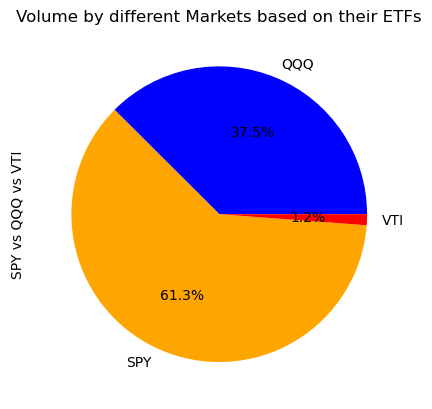

In [ ]:
colors = ["blue","orange","red"]
label = count1.index.values
plt.pie(count1, labels=label, autopct="%1.1f%%", startangle=0, colors=colors,shadow=False)
plt.title("Volume by different Markets based on their ETFs")
plt.ylabel("SPY vs QQQ vs VTI")
plt.show()